Usando K-means y el archvio **wine.csv** realizar los siguientes ejercicios
- Para $k=1,2,...,10$. Calcula el WCSS para cada k y graficalos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importar wine.csv
df = pd.read_csv("/content/drive/MyDrive/wine.csv")

X = df.drop(columns='target')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

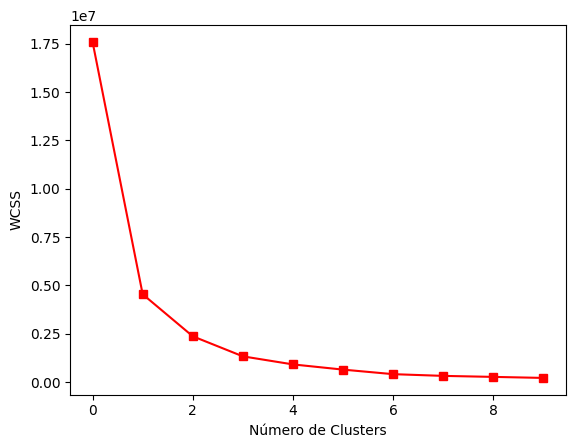

WCSS =  17592296.383508474
WCSS =  4543749.614531861
WCSS =  2370689.686782969
WCSS =  1333139.2086165317
WCSS =  916379.1871539169
WCSS =  647326.0020260848
WCSS =  412303.8282508012
WCSS =  323223.24705426686
WCSS =  271134.42301074375
WCSS =  217936.7969604421


In [ ]:
#Calcular WCSS para k=1,...,10
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=800)
  kmeans.fit(X)
  y = kmeans.predict(X)
  aux = kmeans.inertia_
  wcss.append(aux)
  #print("WCSS = ",aux)
#Graficar
plt.plot(wcss,color='red' , marker='s')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()
for j in wcss:
  print("WCSS = ", j)

- Justifica qué valor de k sería el *el más óptimo*

El más óptimo sería $k=3$ porque a partir de ahí no hay una reducción grande en el valor de WCSS.

-Obtén las diferentes clases de vinos

In [ ]:
#k=3 probar también 4
kmeans = KMeans(n_clusters=3, random_state=800)
kmeans.fit(X)
y = kmeans.predict(X)
print(y)

[0 0 3 3 2 3 3 3 0 0 3 3 3 0 3 3 3 0 3 0 2 2 0 0 0 0 3 3 0 0 3 3 0 3 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 3 0 3 3 3 0 0 0 3 3 1 2 1 2 1 1 2 1 1 2 2 0 1 1 0
 0 1 1 1 2 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 0 2 1 2 1 2 2 1 1 2 1 1 1 1 2 2
 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 0 0 1 2
 2 2 1 1 1 2 2 2 1 0 2 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 0 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def plot_clusters(X1, y=None):
    plt.scatter(X1[:, 0], X1[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X['alcohol'],y)

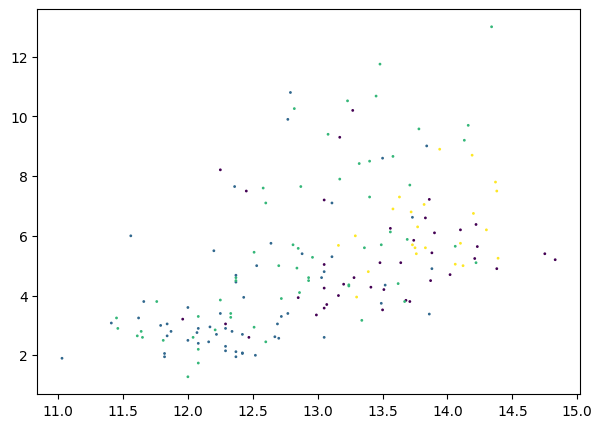

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X['alcohol'], X['color_intensity'], c=y, s=1)

2. Usando el archivo **clusters.csv** realizaa lo siguiente

- Utiliza Hierarchical clustering, K-Means, DBSCAN y GaussianMixture para obtener los diferentes clusters.

- Utiliza al menos tres formas de evaluar los resultados de los algoritmos utilizados.

SE usaron las siguientes métricas:

Índice de Silhouette mide que tan similar es un objeto a su propio grupo en comparación con otros grupos.

Índice de Calinski, también llamado críterio de Relacion de Varianza, evalua el grado de agrupación de un conjunto de datos, mientras mayor sea el índice mejro es la agrupación.

Índice de Davies-Bouldin compara la distancia promedio de cada grupo(respecto a su centroide) y la contrasta con la distancia entre grupos.

In [2]:
#Importar métricas para evaluar los algoritmos
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Importar datos de clusters.csv
df = pd.read_csv("/content/drive/MyDrive/clusters.csv")
df


,x,y
0,0.816729,1.327191
1,0.286716,1.304853
2,2.087953,0.025302
3,0.418027,1.034951
4,1.230035,-0.127041
...,...,...
3245,4.343430,6.717349
3246,-4.310424,5.162806
3247,4.669646,7.294812
3248,-3.898566,1.252578


Indice Silhouette:  0.5348084028951289
Indice de Calinski-Harabasz:  6496.2588962944
Indice de Davies-Bouldin:  0.5916729924785065


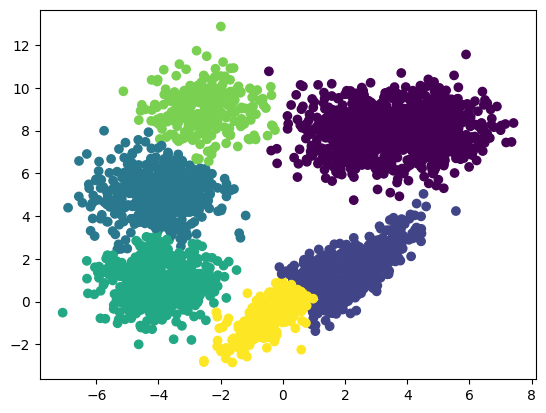

In [62]:
#Clustering jerarquizado
agg_cluster = AgglomerativeClustering(n_clusters=6)
y_agg = agg_cluster.fit_predict(df)
plt.scatter(df['x'],df['y'], c=y_agg)
print("Indice Silhouette: ",silhouette_score(df, y_agg))
print('Indice de Calinski-Harabasz: ', calinski_harabasz_score(df, y_agg))
print('Indice de Davies-Bouldin: ', davies_bouldin_score(df, y_agg))

Clustering jerarquizado con 3 clusters

Índice Silhouette:  0.5358818263738331

Indice de Calinski-Harabasz:  4369.612077793723

Indice de Davies-Bouldin:  0.7021415827881393

Clustering jerarquizado con 5 clusters

Índice Silhouette:  0.5607145784814549

Indice de Calinski-Harabasz:  5916.983198886551

Indice de Davies-Bouldin:  0.5577762031566917

Clustering jerarquizado con 7 clusters

Índice Silhouette:  0.4658265717087867

Indice de Calinski-Harabasz:  6950.039218310021

Indice de Davies-Bouldin:  0.7130865438698543

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Indice Silhouette:  0.5452178817011317
Indice de Calinski-Harabasz:  6789.097038110037
Indice de Davies-Bouldin:  0.5983701965101882


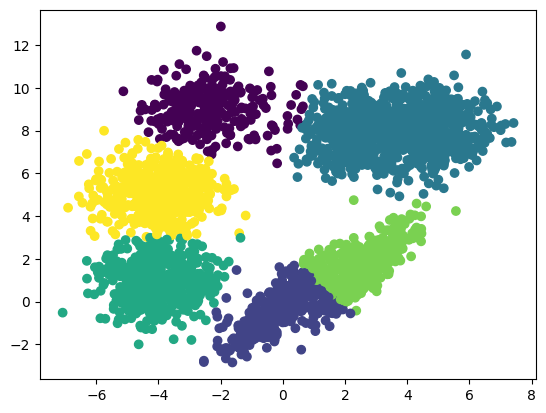

In [61]:
#K-Means
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df['x'],df['y'], c=y_kmeans)

print("Indice Silhouette: ",silhouette_score(df,y_kmeans))
print('Indice de Calinski-Harabasz: ', calinski_harabasz_score(df, y_kmeans))
print('Indice de Davies-Bouldin: ', davies_bouldin_score(df, y_kmeans))

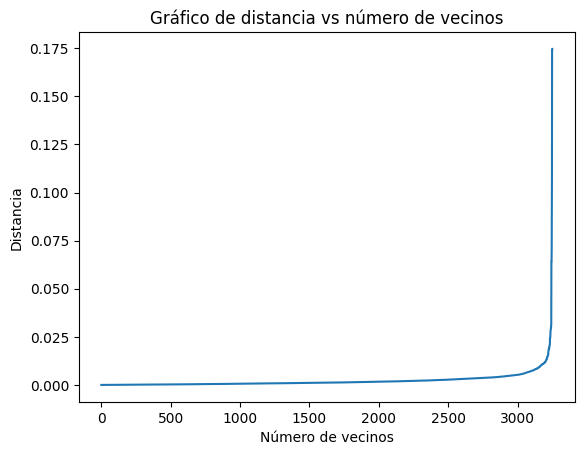

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia')
plt.title('Gráfico de distancia vs número de vecinos')
plt.show()

[0 0 0 ... 6 4 3]
Indice Silhouette:  0.17467197242505442
Indice de Calinski-Harabasz:  1425.0856027188624
Indice de Davies-Bouldin:  1.893770237361403


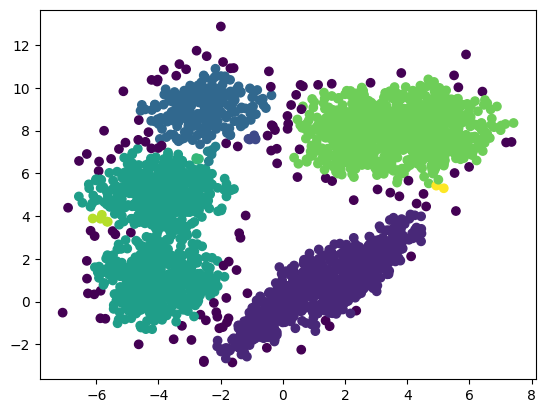

In [60]:
#DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=4)
dbscan.fit(df)
print(dbscan.labels_)
plt.scatter(df['x'],df['y'],c=dbscan.labels_)
print("Indice Silhouette: ",silhouette_score(df,dbscan.labels_))
print('Indice de Calinski-Harabasz: ', calinski_harabasz_score(df,dbscan.labels_))
print('Indice de Davies-Bouldin: ', davies_bouldin_score(df,dbscan.labels_))

Indice Silhouette:  0.5216585623104114
Indice de Calinski-Harabasz:  6260.158170369151
Indice de Davies-Bouldin:  0.6340042529561771


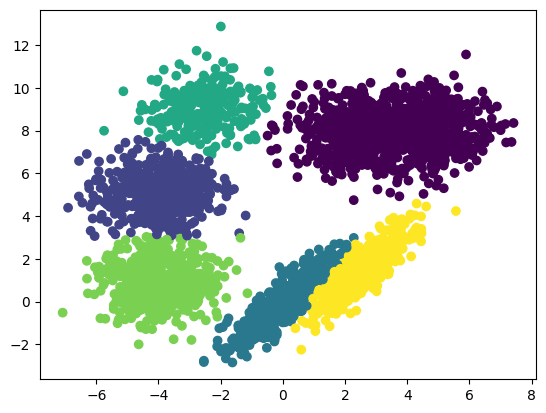

In [63]:
#Gaussian Mixture
gm = GaussianMixture(n_components=6, n_init=4, random_state=42)
gm.fit(df)

y_gmpredict = gm.predict(df)
plt.scatter(df['x'],df['y'], c=y_gmpredict)
print("Indice Silhouette: ",silhouette_score(df,y_gmpredict))
print('Indice de Calinski-Harabasz: ', calinski_harabasz_score(df, y_gmpredict))
print('Indice de Davies-Bouldin: ', davies_bouldin_score(df, y_gmpredict))

- Prueba diferentes hiperparámetros en cada uno de los modelos y reporta aquellos que produzcan los mejores resultados.

**Clustering jerarquizado** con n_clusters=6

Indice Silhouette:  0.5348084028951289

Indice de Calinski-Harabasz:  6496.2588962944

Indice de Davies-Bouldin:  0.5916729924785065

**K-Means** con n_clusters=6

Indice Silhouette:  0.5452075301115001

Indice de Calinski-Harabasz:  6789.095071118997

Indice de Davies-Bouldin:  0.5983595015575033

**DBSCAN** con eps=0.35 y min_samples=4

Indice Silhouette:  0.17467197242505442

Indice de Calinski-Harabasz:  1425.0856027188624

Indice de Davies-Bouldin:  1.893770237361403

**Gaussian Mixture** con n_components=6 y n_init=4

Indice Silhouette:  0.5216585623104114

Indice de Calinski-Harabasz:  6260.158170369151

Indice de Davies-Bouldin:  0.6340042529561771


- ¿Cuál es el número óptimo de clusters para este conjunto de datos? Justifica tu respuesta.

6 debido a que fue el número óptimo para Clustering Jerarquizado, K-Means y para Gaussian Mixture.

- Compara los resultados entre los diferentes algoritmos ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?

K-Means debido a que obtuvo mejor rendimiento en las métricas de Silhouette y Calinski-Harabasz.